<a href="https://colab.research.google.com/github/Mennakurdi/fraud_detection_project/blob/Lojean-branch/notebooks/02_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load processed dataset
df = pd.read_csv('/content/provider_dataset_cleaned.csv')

# Prepare X and y
X = df.drop(columns=['Provider', 'Fraud'])
y = df['Fraud']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Fraud
0    3923
1     405
Name: count, dtype: int64
After SMOTE: Fraud
0    3923
1    3923
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_res, y_train_res)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)

print("Models Trained Successfully")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained Successfully



Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       981
           1       0.41      0.90      0.57       101

    accuracy                           0.87      1082
   macro avg       0.70      0.88      0.75      1082
weighted avg       0.93      0.87      0.89      1082

Confusion Matrix:
[[852 129]
 [ 10  91]]
ROC AUC: 0.9580141500388571

Random Forest
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       981
           1       0.53      0.73      0.61       101

    accuracy                           0.91      1082
   macro avg       0.75      0.83      0.78      1082
weighted avg       0.93      0.91      0.92      1082

Confusion Matrix:
[[915  66]
 [ 27  74]]
ROC AUC: 0.9448077835306465

Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.89      0.94       981
           1       0.45      0.84      0.59 

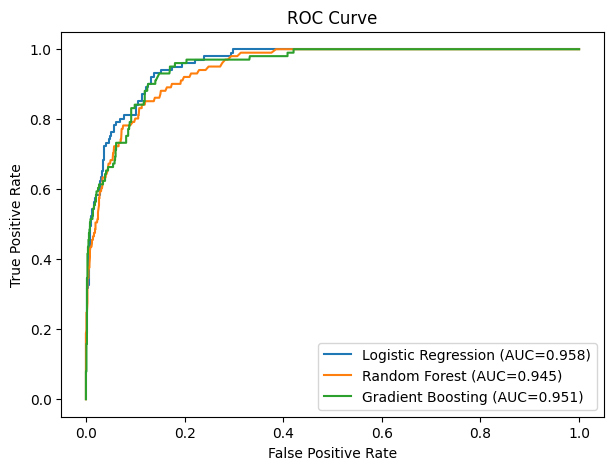

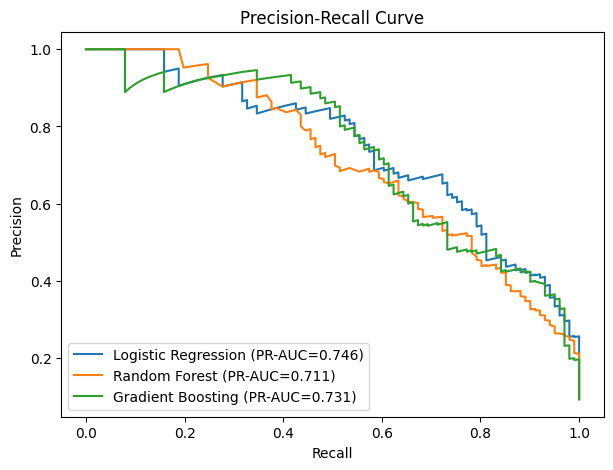

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

# Classification reports
for name, model in models.items():
    print("\n============================")
    print(name)
    print("============================")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    y_prob = model.predict_proba(X_test)[:,1]
    print("ROC AUC:", roc_auc_score(y_test, y_prob))

# ROC CURVES
plt.figure(figsize=(7,5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_value:.3f})")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# PRECISION-RECALL CURVES
plt.figure(figsize=(7,5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (PR-AUC={pr_auc:.3f})")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


In [ ]:
import joblib

joblib.dump(log_model, '/content/log_model.pkl')
joblib.dump(rf_model, '/content/rf_model.pkl')
joblib.dump(gb_model, '/content/gb_model.pkl')


['/content/gb_model.pkl']